# 타이타닉 데이터 조합별 통계 및 시각화 <hr>
<img src = "https://mintaewon.github.io/images/Titanic/titanic.jpg" width = "450px" height = "300px"> </img><img src = "https://community.heartcount.io/ko/content/images/2023/09/image--1-.jpeg" width = "450px" height = "300px"> </img>
<hr>
---
### 0. 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

print(train_df.columns)
print()
del train_df["Survived"]
print(train_df.columns)
print()
train_df.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage:

---
<hr>

#### 데이터 합치기 
<img src = "https://miro.medium.com/v2/resize:fit:1400/0*Xhaw5NqAkkqRPxUF.png" width = "400px" height = "300px"></img>

In [6]:
test_df.info()
print()
data = pd.concat([train_df, test_df]).reset_index(drop = True)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 1. 카테고리형 <-> 카테고리형

#### 1.1 데이터 전처리(PClass, Age)

In [7]:
data["Age_Range"] = np.nan
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [8]:
# Age 컬럼 결측치 비율 측정

Q1 = data["Age"].quantile(.25)
Q3 = data["Age"].quantile(.75)

age_avg = data["Age"].mean()
age_isna = data["Age"].isna()

for idx in range(len(age_isna)):
    if age_isna[idx]:
        data.iloc[idx, 4] = np.random.randint(age_avg - ((Q3 - Q1) * 1.5), age_avg + ((Q3 - Q1) * 1.5), 1)
        
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,3.0,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1307,1308,3,"Ware, Mr. Frederick",male,53.0,0,0,359309,8.0500,NaN,S,NaN


In [9]:
for i in range(len(data)):
    if data.loc[i, "Age"] >= 60 :
        data.loc[i, "Age_Range"] = "senior"
    elif data.loc[i, "Age"] >= 40 :
        data.loc[i, "Age_Range"] = "middle-aged"
    elif data.loc[i, "Age"] >= 30 :
        data.loc[i, "Age_Range"] = "adult"
    elif data.loc[i, "Age"] >= 20 :
        data.loc[i, "Age_Range"] = "young-adult"
    elif data.loc[i, "Age"] >= 10 :
        data.loc[i, "Age_Range"] = "adolescent"
    else:
        data.loc[i, "Age_Range"] = "kid"
data

C:\Users\82102\AppData\Local\Temp\ipykernel_27148\3535536472.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'young-adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[i, "Age_Range"] = "young-adult"


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young-adult
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young-adult
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,3.0,0,0,A.5. 3236,8.0500,NaN,S,kid
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,adult
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,adult
1307,1308,3,"Ware, Mr. Frederick",male,53.0,0,0,359309,8.0500,NaN,S,middle-aged


In [10]:
data.pivot_table(index = "Pclass", columns = "Age_Range", aggfunc = "size", observed = True)

Age_Range,adolescent,adult,kid,middle-aged,senior,young-adult
Pclass,,,,,,
1,34,79,10,115,26,59
2,31,69,25,52,8,92
3,119,140,88,110,6,246


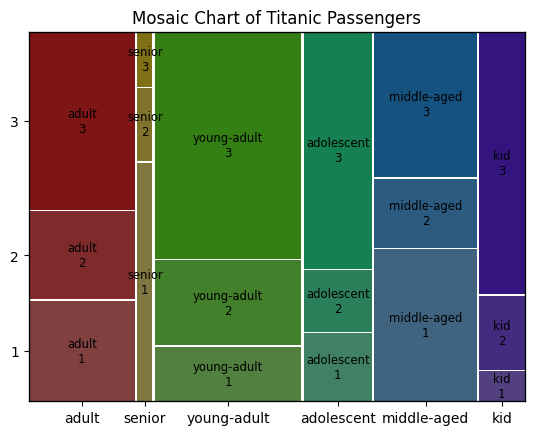

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data.sort_values('Pclass'), ['Age_Range', 'Pclass'], title='Mosaic Chart of Titanic Passengers')
plt.show()

#### 2. 숫자 - 카테고리

---

2.1 박스플롯

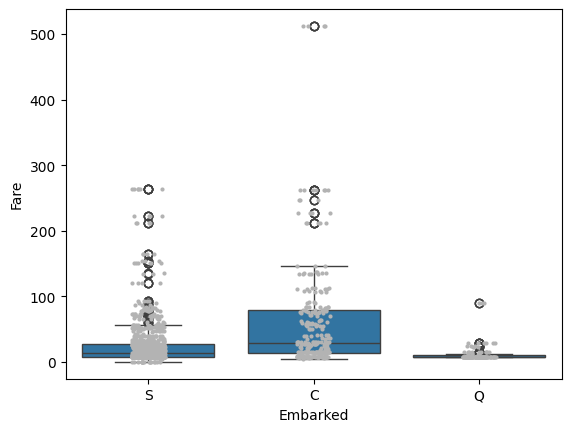

In [12]:
sns.boxplot(x = "Embarked", y = "Fare", data = data)
sns.stripplot(x = "Embarked", y = "Fare", data = data, jitter = True, color = "0.7", size = 3)
plt.show()

2.2 카테고리별 통계 값 출력하기<br>
    탑승위치별 요금의 평균, 중간값

In [13]:
data.groupby("Embarked")["Fare"].mean()

Embarked
C    62.336267
Q    12.409012
S    27.418824
Name: Fare, dtype: float64

In [14]:
data.groupby("Embarked")["Fare"].median()

Embarked
C    28.51875
Q     7.75000
S    13.00000
Name: Fare, dtype: float64

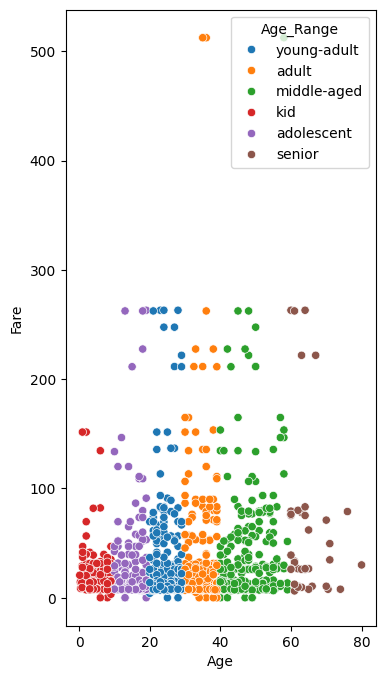

In [25]:
plt.figure(figsize = (4, 8))
sns.scatterplot(x = "Age", y = "Fare", hue = "Age_Range", data = data)
plt.show()